In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam, Nadam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Kaggle Titanic Dataset
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocessing
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
data.dropna(inplace=True)
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Features and labels
X = data.drop('Survived', axis=1).values
y = data['Survived'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# List of optimizers
optimizers = {
    "Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "Nesterov": SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "AdaGrad": Adagrad(learning_rate=0.01),
    "RMSProp": RMSprop(learning_rate=0.01),
    "Adam": Adam(learning_rate=0.01),
    "Nadam": Nadam(learning_rate=0.01)
}

# Train and evaluate models
results = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_test, y_test))
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}\n")

# Compare Results
print("\nFinal Accuracy Comparison:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


Training with Momentum optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Momentum Accuracy: 0.8252

Training with Nesterov optimizer...
Nesterov Accuracy: 0.7902

Training with AdaGrad optimizer...
AdaGrad Accuracy: 0.7972

Training with RMSProp optimizer...
RMSProp Accuracy: 0.8112

Training with Adam optimizer...
Adam Accuracy: 0.7972

Training with Nadam optimizer...
Nadam Accuracy: 0.7972


Final Accuracy Comparison:
Momentum: 0.8252
Nesterov: 0.7902
AdaGrad: 0.7972
RMSProp: 0.8112
Adam: 0.7972
Nadam: 0.7972


Training with SGD with Momentum...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD with Momentum - Test MAE: nan

Training with Nesterov Momentum...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nesterov Momentum - Test MAE: 91201.0547

Training with AdaGrad...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AdaGrad - Test MAE: 148037.3438

Training with RMSProp...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RMSProp - Test MAE: 56319.8477

Training with Adam...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Adam - Test MAE: 55844.4570

Training with Nadam...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nadam - Test MAE: 55899.2070



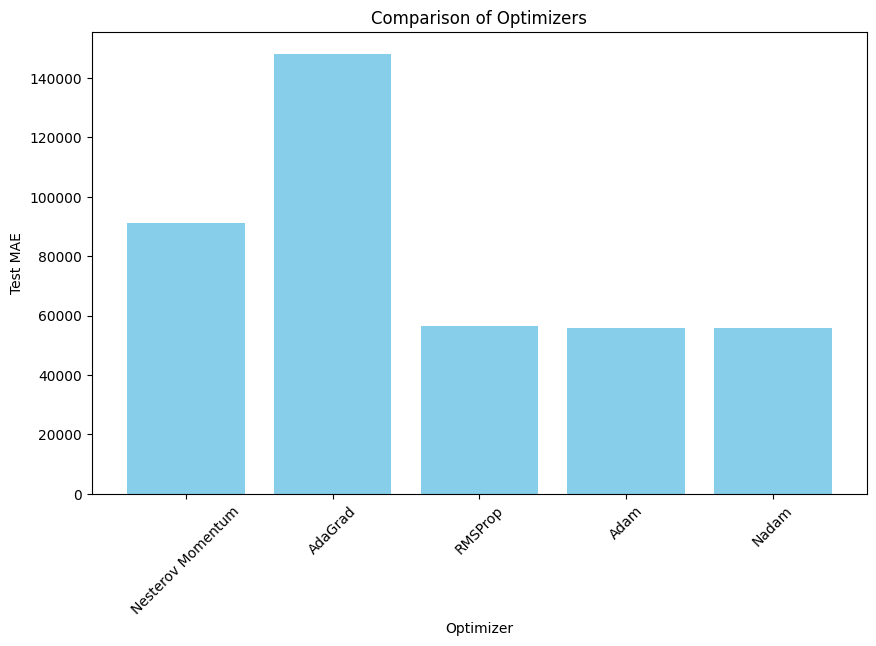

In [3]:
# Step 1: Install Required Libraries (Run this in your terminal or notebook)
# pip install tensorflow pandas numpy matplotlib scikit-learn

# Step 2: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Step 3: Load and Preprocess Data
# Load the dataset directly from a URL
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url)  # Load the dataset from the URL

# Drop missing values
data = data.dropna()

# Separate features and target
X = data.drop("median_house_value", axis=1)  # Features
y = data["median_house_value"]  # Target

# Handle categorical data (ocean_proximity column)
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define the Model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)  # Regression output
    ])
    return model

# Step 5: Define Optimizers and Train the Model
optimizers = {
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "Nesterov Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "AdaGrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "RMSProp": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "Nadam": tf.keras.optimizers.Nadam(learning_rate=0.001)
}

# Train and evaluate the model with each optimizer
results = {}
for opt_name, optimizer in optimizers.items():
    print(f"Training with {opt_name}...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    results[opt_name] = test_mae

    print(f"{opt_name} - Test MAE: {test_mae:.4f}\n")

# Step 6: Compare Results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel("Optimizer")
plt.ylabel("Test MAE")
plt.title("Comparison of Optimizers")
plt.xticks(rotation=45)
plt.show()